In [ ]:
import json
import pandas as pd

## Prepare the dictionary with secondary-primary category mammpings to use with pd.replace()

In [25]:
categories = pd.read_csv('/home/wojciech/Desktop/GitHub/Spring23_DW/data/raw/categories.csv')
categories.head()

,first_level,second_level,is_primary
0,Cars and Transportation,Cars and Transportation,yes
1,Education,Education,yes
2,Learning German,Learning German,yes
3,Digital World,Digital World,yes
4,History,History,yes


In [26]:
to_replace = categories.loc[categories['is_primary'] == 'no']   #We're only replacing secondary categories
to_replace

,first_level,second_level,is_primary
10,Culture,Architecture,no
11,Culture,Design,no
12,Culture,Film,no
13,Culture,Arts,no
14,Culture,Literature,no
15,Culture,Music,no
16,Culture,Dance,no
17,Culture,Theater,no
25,Politics,Conflicts,no
26,Politics,Terrorism,no


In [27]:
to_replace = dict(zip(to_replace['second_level'], to_replace['first_level']))
to_replace

{'Architecture': 'Culture',
 'Design': 'Culture',
 'Film': 'Culture',
 'Arts': 'Culture',
 'Literature': 'Culture',
 'Music': 'Culture',
 'Dance': 'Culture',
 'Theater': 'Culture',
 'Conflicts': 'Politics',
 'Terrorism': 'Politics',
 'Corruption': 'Law and Justice',
 'Crime': 'Law and Justice',
 'Rule of Law': 'Law and Justice',
 'Press Freedom': 'Law and Justice',
 'Diversity': 'Human Rights',
 'Freedom of Speech': 'Human Rights',
 'Equality': 'Human Rights',
 'Trade': 'Business',
 'Globalization': 'Business',
 'Food Security': 'Business'}

## Load dataframe, slice out a smaller chunk 

In [20]:
# Opening JSON file
f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

df = pd.DataFrame.from_dict(data)

print(df.head())

del data

         id                                               name  \
0  16489913                 UN imposes sanctions on DRC rebels   
1  16489912            Catholic Church abuse hotline goes cold   
2  16489903  "Fiscal cliff" tax hikes go into effect in the US   
3  16490025  Kim seeks reconciliation with South, economic ...   
4  16490029  Senate-approved fiscal deal faces House consid...   

                    shortTitle  \
0      UN sanctions DRC rebels   
1                 Disconnected   
2  US goes over "fiscal cliff"   
3    A rare New Year's address   
4   US House mulls fiscal deal   

                                                text  \
0  <p>\n\tThe UN Security Council has sanctioned ...   
1  <p>\n\tFor two and a half years, the counselin...   
2  <p>\n\tAs the clock struck midnight in Washing...   
3  <p>\n\tKim Jong Un, who came to office just ov...   
4  <p>\n\tLess than two hours after the US had of...   

                                              teaser  \
0  A 

In [2]:
for c in df.columns:
    print(c)

id
name
shortTitle
text
teaser
shortTeaser
kicker
regions
keywords
keywordStrings
thematicFocusCategory
navigations
categories
departments
firstPublicationDate
lastModifiedDate
contentDate
relatedAutoTopics
contentLinks
articles
isOpinion
geographicLocations
contentAssociations
mainContentImageLink
images
externalLinks
topStory
language


In [21]:
df['lastModifiedDate'] = pd.to_datetime(df['lastModifiedDate'])

In [22]:
df = df.set_index(['lastModifiedDate'])
start_date = '2019-01-01'
end_date = '2022-01-01'
df_small = df.loc[start_date:end_date]

/home/wojciech/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  after removing the cwd from sys.path.


In [23]:
df_small.reset_index(inplace=True))
del df

## Check for missing category values

In [24]:
df_small['thematicFocusCategory'].head()

lastModifiedDate
2019-01-01 03:57:28.904000+00:00            {'name': 'Science'}
2019-01-01 06:11:50.527000+00:00    {'name': 'Law and Justice'}
2019-01-01 06:14:35.563000+00:00           {'name': 'Politics'}
2019-01-01 08:26:11.599000+00:00              {'name': 'Crime'}
2019-01-01 09:05:00.736000+00:00           {'name': 'Politics'}
Name: thematicFocusCategory, dtype: object

In [28]:
result = df_small.loc[df_small['thematicFocusCategory'].isnull()]
result[['id', 'name', 'thematicFocusCategory']]

,id,name,thematicFocusCategory
lastModifiedDate,,,
2019-01-03 08:18:56.426000+00:00,15907056,What is RSS?,None
2019-01-05 22:51:39.152000+00:00,46964511,Poland: 5 teenage girls die in 'escape room' fire,None
2019-01-06 11:29:27.969000+00:00,46970878,Egypt police officer killed defusing bomb at C...,None
2019-01-09 15:22:19.944000+00:00,46942844,Lara Babalola,None
2019-01-17 04:04:05.183000+00:00,47108931,Body of missing German tourist found in Australia,None
...,...,...,...
2021-12-23 12:29:25.281000+00:00,60206554,What’s your favorite drink for bringing in the...,None
2021-12-30 07:00:28.233000+00:00,60208740,What are you hoping for in 2022?,None
2021-12-30 11:46:09.471000+00:00,60294706,The Road to Happiness!,None


In [35]:
df_small['date'] = df_small['lastModifiedDate'].dt.date
print(df_small['date'])

0        2019-01-01
1        2019-01-01
2        2019-01-01
3        2019-01-01
4        2019-01-01
            ...    
33837    2021-12-31
33838    2021-12-31
33839    2021-12-31
33840    2021-12-31
33841    2021-12-31
Name: date, Length: 33842, dtype: object


(array([17897., 18017., 18140., 18262., 18383., 18506., 18628., 18748.,
        18871., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

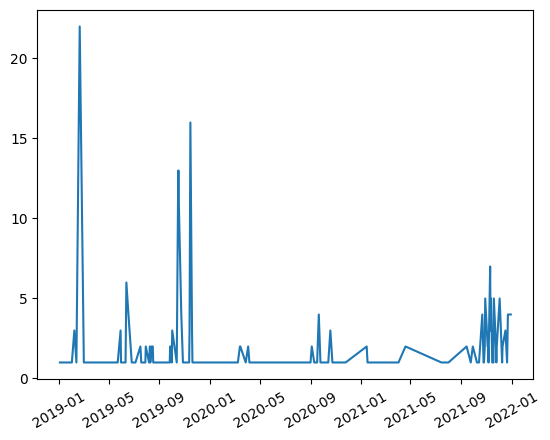

In [45]:
missing = df_small.loc[df_small['thematicFocusCategory'].isnull()].groupby('date', as_index=False).count()[['date', 'id']]
missing

import matplotlib.pyplot as plt

plt.plot(missing['date'], missing['id'])
plt.xticks(rotation=30)

In [49]:
df_small.loc[df_small['thematicFocusCategory'] == '[Miscellaneous]']

,lastModifiedDate,id,name,shortTitle,text,teaser,shortTeaser,kicker,regions,keywords,...,articles,isOpinion,geographicLocations,contentAssociations,mainContentImageLink,images,externalLinks,topStory,language,date


There are no columns with label 'Miscellaneous' but there are ~300 columns with no category. For now those with no category removed.

In [50]:
df_small = df_small.loc[df_small['thematicFocusCategory'].isnull() == False]

In [56]:
df_small['thematicFocusCategoryStrings'] = df_small['thematicFocusCategory'].apply(func = lambda dic: dic['name'])
df_small[['thematicFocusCategory', 'thematicFocusCategoryStrings']].head()

/home/wojciech/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,thematicFocusCategory,thematicFocusCategoryStrings
0,{'name': 'Science'},Science
1,{'name': 'Law and Justice'},Law and Justice
2,{'name': 'Politics'},Politics
3,{'name': 'Crime'},Crime
4,{'name': 'Politics'},Politics


In [57]:
df_small['thematicFocusCategoryPrimary'] = df_small['thematicFocusCategoryStrings'].replace(to_replace)
df_small[['thematicFocusCategoryStrings', 'thematicFocusCategoryPrimary']]

/home/wojciech/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,thematicFocusCategoryStrings,thematicFocusCategoryPrimary
0,Science,Science
1,Law and Justice,Law and Justice
2,Politics,Politics
3,Crime,Law and Justice
4,Politics,Politics
...,...,...
33837,Politics,Politics
33838,Crime,Law and Justice
33839,Health,Health
33840,Politics,Politics


In [69]:
print(categories.loc[categories['is_primary'] == 'yes']['first_level'].to_string(header=False, index=False))

Cars and Transportation
              Education
        Learning German
          Digital World
                History
                Society
                 Health
               Religion
            Catastrophe
                Culture
              Lifestyle
                  Media
              Migration
 Nature and Environment
                Climate
                Offbeat
               Politics
        Law and Justice
           Human Rights
                 Travel
                 Sports
                 Soccer
             Technology
             Innovation
               Business
                Science
        [Miscellaneous]
             Video News
